In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

### Carga de Datos

In [2]:
iris = datasets.load_iris()
Y = iris.target

### Normalizar datos

In [3]:
normalizar = MinMaxScaler()
iris_norm = normalizar.fit(iris.data)
X = normalizar.transform(iris.data)

### HOLD OUT

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=1/3)

# EXPERIMENTOS K=3,4,5,....15

In [5]:
n_experimentos = 13
n_clusters_minimo = 3
aciertos_kmeans = np.zeros(n_experimentos, dtype=int)
aciertos_Agmin = np.zeros(n_experimentos, dtype=int)
aciertos_Agmax = np.zeros(n_experimentos, dtype=int)
aciertos_Agmean = np.zeros(n_experimentos, dtype=int)
aciertos_Agward = np.zeros(n_experimentos, dtype=int)
for K in range(n_clusters_minimo, n_clusters_minimo + n_experimentos):
    kmedias = KMeans(n_clusters=K).fit(X_train)
    etiqueta_kmeans = np.zeros(K, dtype=int)
    
    Agmin = AgglomerativeClustering(n_clusters=K,linkage="single").fit(X_train)
    etiqueta_Agmin = np.zeros(K, dtype=int)
    
    Agmax = AgglomerativeClustering(n_clusters=K,linkage="complete").fit(X_train)
    etiqueta_Agmax = np.zeros(K, dtype=int)
    
    Agmean = AgglomerativeClustering(n_clusters=K,linkage="average").fit(X_train)
    etiqueta_Agmean = np.zeros(K, dtype=int)
    
    Agward = AgglomerativeClustering(n_clusters=K,linkage="ward").fit(X_train)
    etiqueta_Agward = np.zeros(K, dtype=int)
    
    for j in range(K):
        etiqueta_kmeans[j] = mode(y_train[np.argwhere(kmedias.labels_ == j)])[0][0][0]
        etiqueta_Agmin[j] = mode(y_train[np.argwhere(Agmin.labels_ == j)])[0][0][0]
        etiqueta_Agmax[j] = mode(y_train[np.argwhere(Agmax.labels_ == j)])[0][0][0]
        etiqueta_Agmean[j] = mode(y_train[np.argwhere(Agmean.labels_ == j)])[0][0][0]
        etiqueta_Agward[j] = mode(y_train[np.argwhere(Agward.labels_ == j)])[0][0][0]
        
        
    aciertos_kmeans[K - n_clusters_minimo] = np.sum(etiqueta_kmeans[kmedias.predict(X_test)] == y_test)
    aciertos_Agmin[K - n_clusters_minimo] = np.sum(etiqueta_Agmin[Agmin.fit_predict(X_test)] == y_test)
    aciertos_Agmax[K - n_clusters_minimo] = np.sum(etiqueta_Agmax[Agmax.fit_predict(X_test)] == y_test)
    aciertos_Agmean[K - n_clusters_minimo] = np.sum(etiqueta_Agmean[Agmean.fit_predict(X_test)] == y_test)
    aciertos_Agward[K - n_clusters_minimo] = np.sum(etiqueta_Agward[Agward.fit_predict(X_test)] == y_test)
    
print("       n_clusters = ", np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos))
print("aciertos k-medias = ", aciertos_kmeans/len(y_test))
print("  aciertos Aglomerativos min = ", aciertos_Agmin/len(y_test))
print("  aciertos Aglomerativos max = ", aciertos_Agmax/len(y_test))
print("  aciertos Aglomerativos media = ", aciertos_Agmean/len(y_test))
print("  aciertos Aglomerativos ward = ", aciertos_Agward/len(y_test))

       n_clusters =  [ 3  4  5  6  7  8  9 10 11 12 13 14 15]
aciertos k-medias =  [0.86 0.86 0.84 0.86 0.96 0.92 0.92 0.94 0.92 0.9  0.9  0.9  0.94]
  aciertos Aglomerativos min =  [0.66 0.68 0.64 0.6  0.32 0.08 0.22 0.68 0.18 0.38 0.34 0.14 0.12]
  aciertos Aglomerativos max =  [0.   0.   0.18 0.3  0.5  0.34 0.2  0.1  0.18 0.36 0.36 0.46 0.46]
  aciertos Aglomerativos media =  [0.2  0.34 0.34 0.16 0.16 0.4  0.44 0.66 0.32 0.32 0.22 0.28 0.28]
  aciertos Aglomerativos ward =  [0.88 0.88 0.32 0.32 0.18 0.48 0.48 0.5  0.46 0.42 0.42 0.3  0.14]


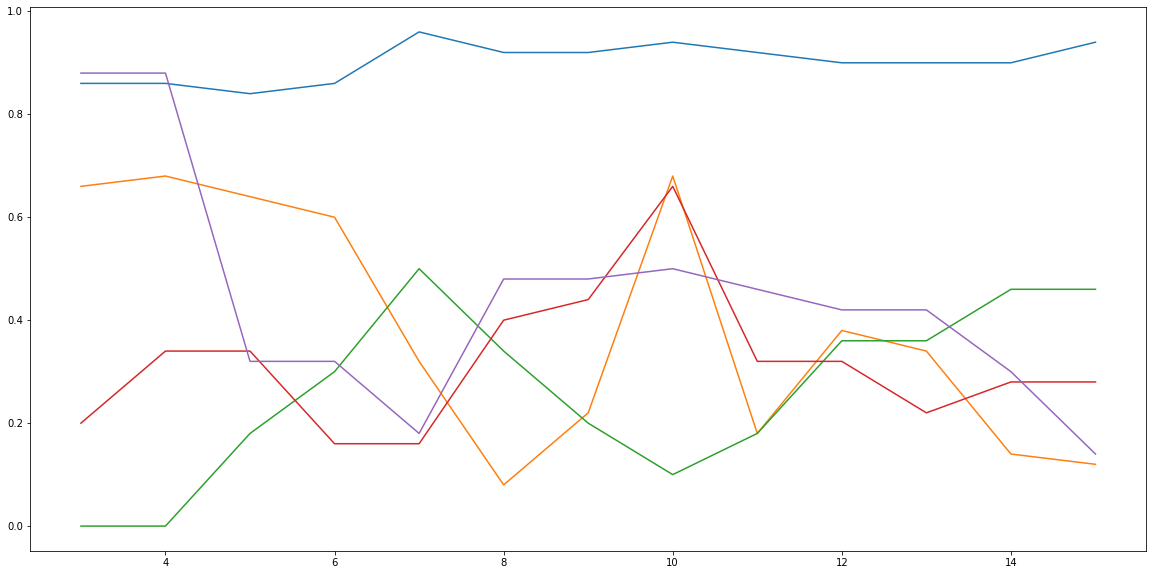

In [6]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos), aciertos_kmeans/len(y_test))
plt.plot(np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos), aciertos_Agmin/len(y_test))
plt.plot(np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos), aciertos_Agmax/len(y_test))
plt.plot(np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos), aciertos_Agmean/len(y_test))
plt.plot(np.arange(n_clusters_minimo, n_clusters_minimo + n_experimentos), aciertos_Agward/len(y_test))
plt.show()

In [7]:
iris = datasets.load_iris()
Y = iris.target

In [8]:
normalizar = StandardScaler()
iris_norm = normalizar.fit(iris.data)
X = normalizar.transform(iris.data)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=1/3)

In [10]:
kmedias = KMeans(n_clusters=15).fit(X_train)
X2_train=kmedias.cluster_centers_

In [11]:
ward = AgglomerativeClustering(n_clusters=6,linkage="ward").fit(X2_train)

y_predict = ward.fit_predict(X2_train)
clf = NearestCentroid()
clf.fit(X2_train, y_predict)

NearestCentroid()

In [12]:
kmedias2 = KMeans(n_clusters = 6, n_init=1, init = clf.centroids_).fit(X_train)

etiqueta_kmeans2 = np.zeros(6, dtype=int)
for j in range(6):
    etiqueta_kmeans2[j] = mode(y_train[np.argwhere(kmedias2.labels_ == j)])[0][0][0]

    
accuracy=accuracy_score(y_test,etiqueta_kmeans2[kmedias2.predict(X_test)])
aciertos_kmeans2= np.sum(etiqueta_kmeans2[kmedias2.predict(X_test)] == y_test)
print("Porcentaje de aciertos: ",aciertos_kmeans2/len(y_test))

Porcentaje de aciertos:  0.84


In [13]:
kmedias = KMeans(n_clusters=6).fit(X_train)
etiqueta_kmeans = np.zeros(6, dtype=int)
for j in range(6):
    etiqueta_kmeans[j] = mode(y_train[np.argwhere(kmedias.labels_ == j)])[0][0][0]


accuracy2=accuracy_score(y_test,etiqueta_kmeans[kmedias.predict(X_test)])
aciertos_kmeans= np.sum(etiqueta_kmeans[kmedias.predict(X_test)] == y_test)
print("Porcentaje de aciertos: ",accuracy2)
# Se obtiene un resultado muy parecido en la mayoría de los casos

Porcentaje de aciertos:  0.82
